# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
mice_count = mouse_study_complete['Mouse ID'].nunique()
mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1 = pd.DataFrame(mouse_study_complete)
duplicated_rows = df1[df1.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#see above (lD)

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study_clean = df1.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)
mice_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mice_study_clean['Mouse ID'].nunique()
mice_count_clean

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regime

drug_regimen = mice_study_clean.groupby(["Drug Regimen"]).count()
drug_regimen.head()

mean_tumor_vol_df = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
mean_tumor_vol_df = mean_tumor_vol_df.groupby(['Drug Regimen']).mean()
mean_tumor_vol_df.head()

median_tumor_vol_df = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
median_tumor_vol_df = median_tumor_vol_df.groupby(['Drug Regimen']).median()
median_tumor_vol_df.head()

tumor_vol_var_df = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol_var_df = tumor_vol_var_df.groupby(['Drug Regimen']).var()
tumor_vol_var_df.head()

tumor_vol_std_dev_df = mice_study_clean[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_vol_std_dev_df = tumor_vol_std_dev_df.groupby(['Drug Regimen']).std()
tumor_vol_std_dev_df.head()

tumor_vol_std_err_df = mice_study_clean[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_vol_std_err_df = tumor_vol_std_err_df.groupby(['Drug Regimen']).sem()
tumor_vol_std_err_df.head()

summary_columns = {"Drug Regimen":drug_regimen.index,
                    "Mean Tumor Volume": mean_tumor_vol_df["Tumor Volume (mm3)"].values, 
                    "Median Tumor Volume": median_tumor_vol_df["Tumor Volume (mm3)"].values, 
                    "Tumor Volume Variance": tumor_vol_var_df["Tumor Volume (mm3)"].values, 
                    "Tumor Volume Std. Dev.": tumor_vol_std_dev_df["Tumor Volume (mm3)"].values,
                    "Tumor Volume Std. Err.": tumor_vol_std_err_df["Tumor Volume (mm3)"].values}

summary_df = pd.DataFrame(summary_columns)
summary_df = summary_df.set_index("Drug Regimen")
summary_df.head()



# Set the index to be "State" so they will be used as labels
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

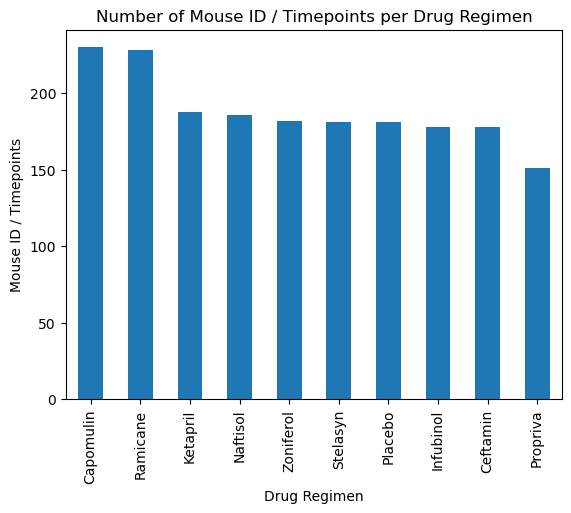

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen = mice_study_clean["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar")
plt.title("Number of Mouse ID / Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID / Timepoints")
plt.show()

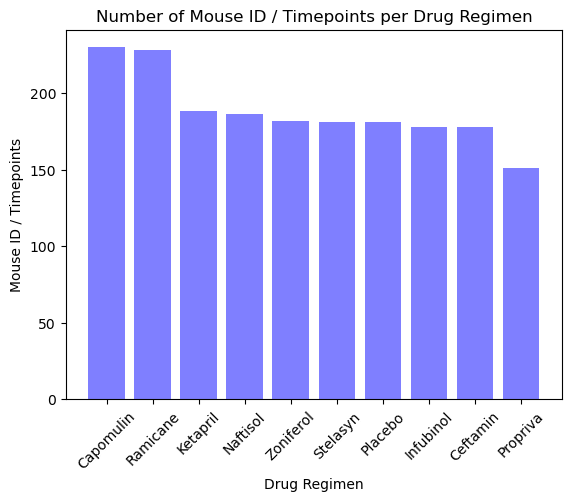

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
#for each drug regimen using pyplot.
drug_regimen = mice_study_clean["Drug Regimen"].value_counts()
drug_regimen.values
x_axis = drug_regimen.index
y_axis = drug_regimen.values
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Number of Mouse ID / Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID / Timepoints")
plt.show()

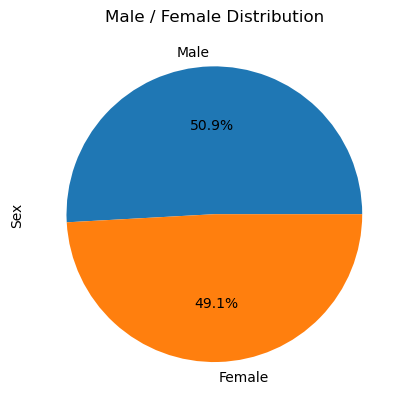

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution_gender = mice_study_clean["Sex"].value_counts()
distribution_gender.plot(kind="pie", autopct='%1.1f%%')
plt.title("Male / Female Distribution")
plt.show()

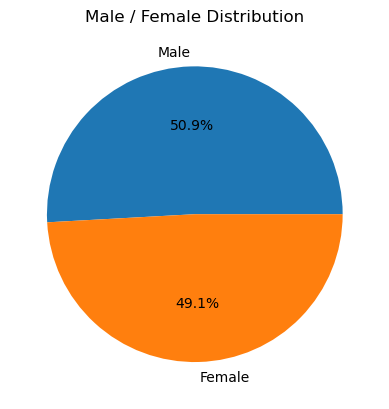

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_gender = mice_study_clean["Sex"].value_counts()
x_axis = distribution_gender.index
y_axis = distribution_gender.values
plt.pie(y_axis, labels=x_axis, autopct='%1.1f%%')
plt.title("Male / Female Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [17]:
# Start by getting the last (greatest) timepoint for each mouse

tumor_vol_max = mice_study_clean.groupby(["Mouse ID"])["Timepoint"].max()
tumor_vol_max = tumor_vol_max.reset_index()
tumor_vol_max

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [18]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_max_timepoint = tumor_vol_max.merge(mice_study_clean, how="left", on=["Mouse ID", "Timepoint"])

# Display the data table for preview
tumor_vol_max_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_max_timepoint.loc[tumor_vol_max_timepoint["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol )
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    
    print(f"{drug} potential outliers: {outliers}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


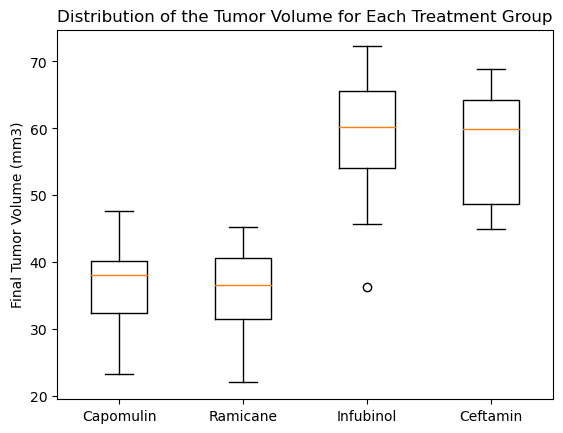

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of the Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels = regimen_list)
plt.show()

## Line and Scatter Plots

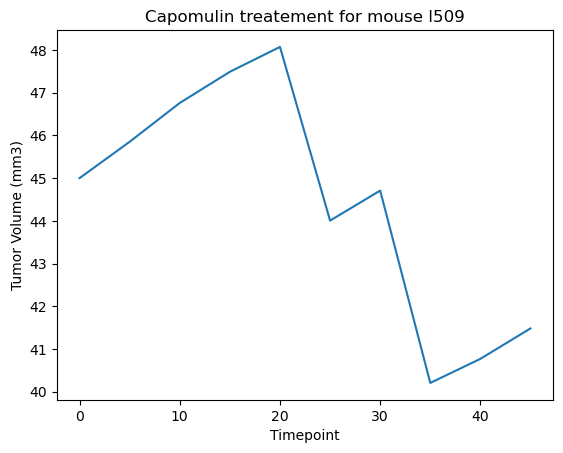

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = mice_study_clean.loc[mice_study_clean["Drug Regimen"] == "Capomulin"]

mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == 'l509']
mouse_data
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

plt.title('Capomulin treatement for mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

plt.show()

/var/folders/jj/32_dqrr12sg5q8_ykvw5s5cr0000gn/T/ipykernel_73501/1767178931.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_table.groupby('Mouse ID').mean()


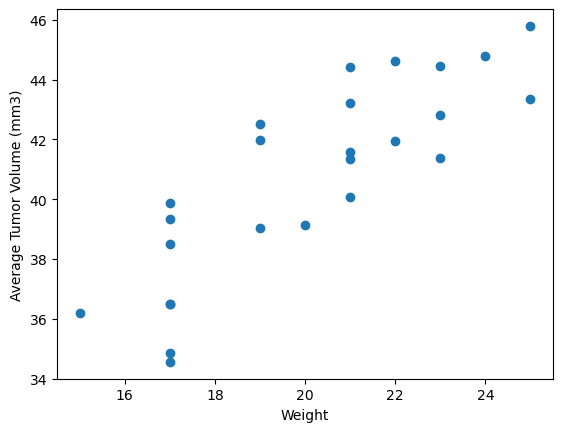

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_table = mice_study_clean.loc[mice_study_clean["Drug Regimen"] == "Capomulin"]

capomulin_average = capomulin_table.groupby('Mouse ID').mean()

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


/var/folders/jj/32_dqrr12sg5q8_ykvw5s5cr0000gn/T/ipykernel_73501/1231196770.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_table.groupby('Mouse ID').mean()


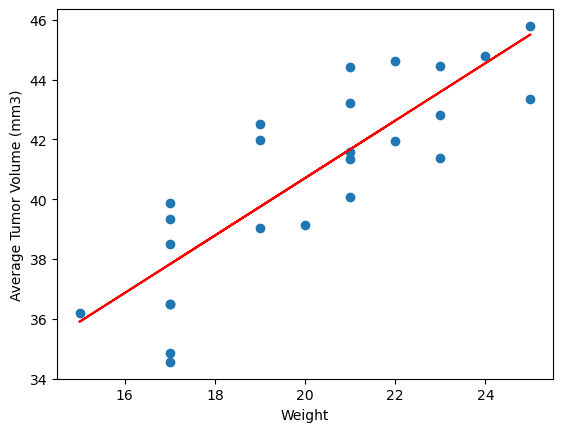

In [51]:
from scipy import stats

weight = capomulin_table["Weight (g)"]
tumor_vol = capomulin_table["Tumor Volume (mm3)"]


capomulin_table = mice_study_clean.loc[mice_study_clean["Drug Regimen"] == "Capomulin"]

capomulin_average = capomulin_table.groupby('Mouse ID').mean()

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(weight, tumor_vol)
p_fit = p_slope * weight + p_int

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(weight,p_fit,"-", color="r")
plt.show()

In [56]:
# Calculate the correlation coefficient between mouse weight and average observed tumor volume 
#for the entire Capomulin regimen
weight_1 = capomulin_average["Weight (g)"]
tumor_vol_1 = capomulin_average["Tumor Volume (mm3)"]


print(f"The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin regimen is {round(st.pearsonr(weight_1, tumor_vol_1)[0],2)}")

The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin regimen is 0.84
